<a href="https://colab.research.google.com/github/rgw3wgs/knn/blob/main/KNN_Homework_ipyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1. This question is a case study for
 nearest neighbor The target variable y is price and the features are year and mileage**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
usa = pd.read_csv('USA_cars_datasets.csv')
usa = usa.loc[:,['price','year','mileage'] ]
print(usa.shape)
usa.head()

(2499, 3)


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [ ]:
usa.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


There are no NA's to andle in this data. 2,499 observations for each variable

*2. Maxmin normalize year and mileage.*

In [ ]:
def maxmin(x):
    i = (x-min(x))/(max(x)-min(x))
    return i

usa['year'] = maxmin(usa['year'])
usa['mileage'] = maxmin(usa['mileage'])

*3. Split the sample into ~80% for training and ~20% for evaluation.*

In [ ]:
b = usa['price']
a = usa.drop('price',axis=1)
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=100)

*4. Use the kNN algorithm and the training data to predict price using year and mileage for the test set for k = 3,10,25,50,100,300. For each value of k, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase*

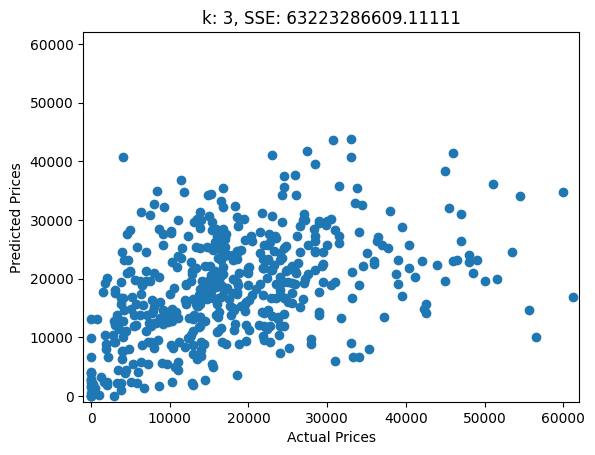

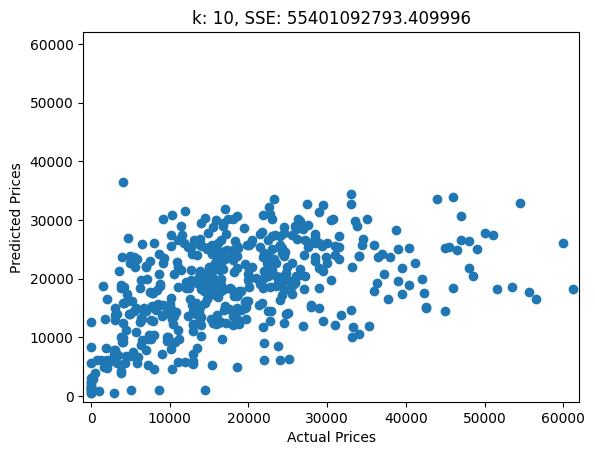

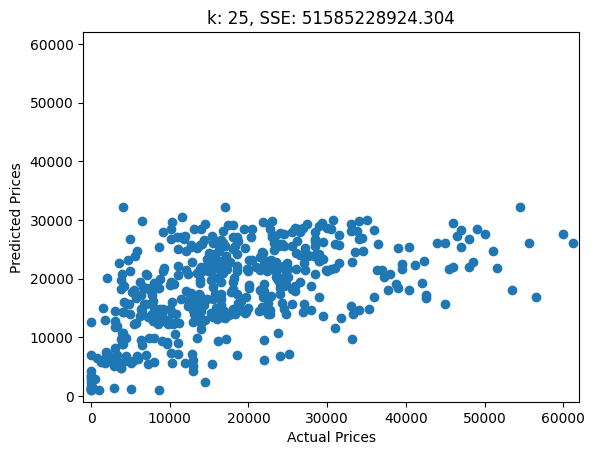

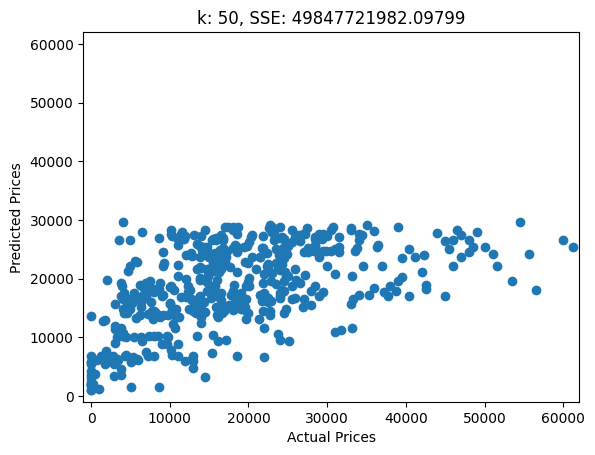

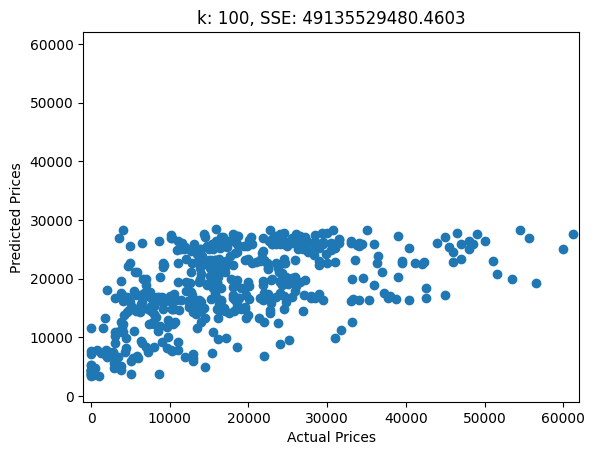

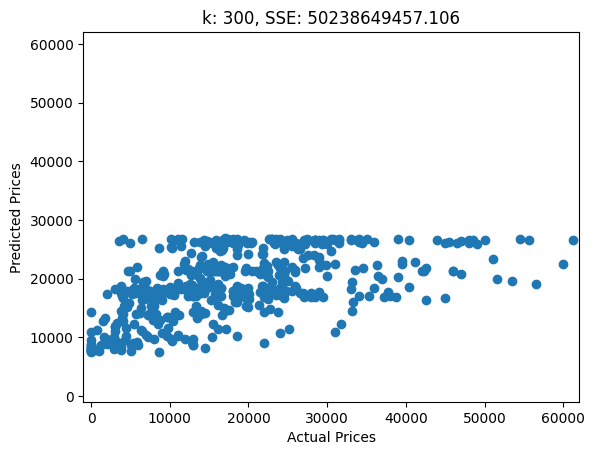

In [ ]:
k_values = [3,10,25,50,100,300]

scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k).fit(a_train,b_train)
    b_hat = model.predict(a_test)
    SSE = np.sum( (b_test-b_hat)**2 )



  #plotting the graph
    plt.scatter(b_test,b_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.ylim(-1000, 62000)
    plt.xlim(-1000, 62000)
    plt.show()




*5. Determine the optimal k for these data.*

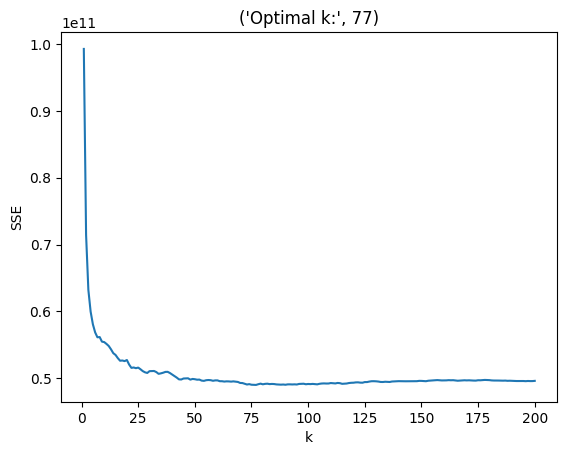

In [ ]:
k_max = 200
k_values = np.arange(1, k_max + 1)
SSE = np.zeros_like(k_values)

for i, k in enumerate(k_values):
    model = KNeighborsRegressor(n_neighbors=k).fit(a_train, b_train)
    b_pred = model.predict(a_test)
    SSE[i] = np.sum((b_test - b_pred) ** 2)

optimal_k = k_values[np.argmin(SSE)]
opt_k = ("Optimal k:", optimal_k)

# Plot SSE by k
plt.plot(k_values, SSE)
plt.xlabel("k")
plt.title(opt_k)
plt.ylabel('SSE')
plt.show()

*6. Describe what happened in the plots of predicted versus actual prices as
 varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)*

The optimal k for our data and graph is 77. This means that the data under 50 was underfitting and when k = 300 it was overfitting. As you can see in the graph where k = 300 the data points closer to the 3000 line start to form a straight line. When the k was smaller, the data points were more spread out.

** Q2. This question is a case study for k nearest neighbor. The data for the question include:**

*1. Load the ./data/heart_failure_clinical_records_dataset.csv. Are there any NA's to handle? use .drop() to remove time from the dataframe.*

In [199]:
heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [200]:
print("Dimensions: ", heart.shape)
heart.describe()

Dimensions:  (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


There are no NA's in this dataset

In [201]:
heart = heart.drop('time', axis=1)

*2. Make a correlation matrix. What variables are strongly associated with a death event?*

In [202]:
correlation_matrix = heart.corr()
print(correlation_matrix)

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          diabetes  e

In [203]:
#Strongly Associated Variables
variable = correlation_matrix['DEATH_EVENT'].sort_values(ascending=False)
print(variable)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
Name: DEATH_EVENT, dtype: float64


serum_creatinine and age have the strongest positive correlation with DEATH_EVENT. Ejection_fraction and serum_sodium have the strongest negative correlation with DEATH_EVENT.

*3. For the dummy variables anaemia, diabetes, high_blood_pressure, sex, and smoking, compute a summary table of DEATH_EVENT grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?*

In [204]:
summary = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for i in summary:
  table = heart.loc[:,[i, 'DEATH_EVENT']].groupby(i).describe()
  print(table)

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

A higher proportion of the population die when the anaemia and diabetes variables are at 1. This is based on the mean.

*4.On the basis of your answers from 2 and 3, build a matrix X of the variables you think are most predictive of a death, and a variable
 equal to DEATH_EVENT.*

In [205]:
r = heart['DEATH_EVENT']
titles = ['age','ejection_fraction','serum_creatinine','high_blood_pressure','anaemia']
X = heart.loc[:,titles]

*5. Maxmin normalize all of the variables in X*

In [206]:
def maxmin(i):
  z = (i-min(i))/(max(i)-min(i))
  return z

X = X.apply(maxmin)

*6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.)*

In [207]:
np.random.seed(100)
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) ) # Generate random indices for training set
test = [item for item in all if item not in train] # Find test indices

#test = np.where( train not in np.linspace(1,N) )
X_train = X.iloc[train,:]
b_train = r.iloc[train]
X_test = X.iloc[test,:]
b_test = r.iloc[test]



Optimal k: 6


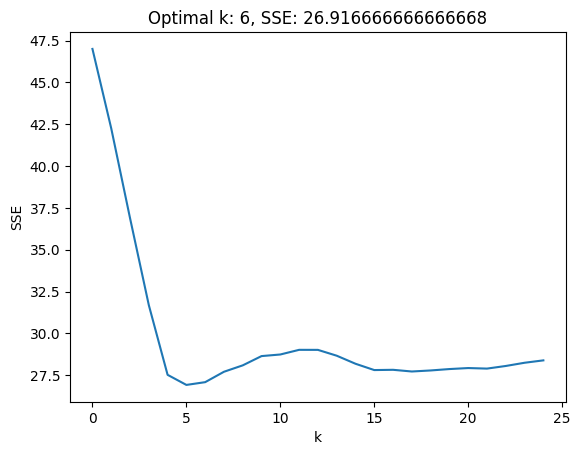

In [208]:
bar = 25
grid = np.arange(1,bar)
SSE = np.zeros(bar)

for i in range(bar):
    knn = KNeighborsRegressor(n_neighbors=i+1)
    knn.fit(X_train, b_train)
    b_pred = knn.predict(X_test)
    SSE[i] = ((b_test - b_pred) ** 2).sum()

SSE_min = np.min(SSE)
min_index = np.argmin(SSE)
star = grid[min_index]
print("Optimal k:", star)

plt.plot(np.arange(0, bar), SSE)
plt.xlabel("k")
plt.title("Optimal k: " + str(star) + ', SSE: ' + str(SSE_min))
plt.ylabel('SSE')
plt.show()

Optimal k: 83


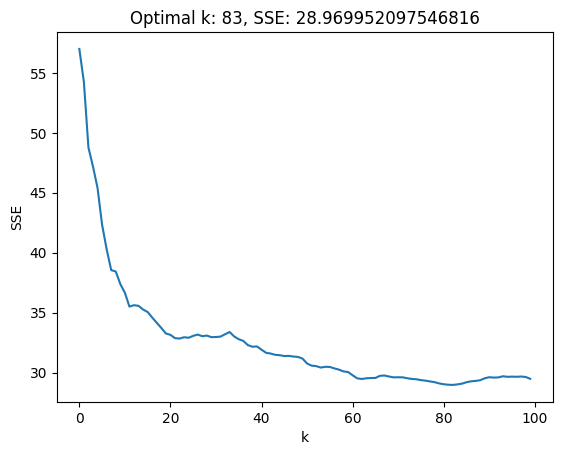

In [198]:
#Testing Preparationg
X = heart.drop('DEATH_EVENT',axis=1)

X_train = X.iloc[train,:]
y_train = r.iloc[train]
X_test = X.iloc[test,:]
y_test = r.iloc[test]

#Optimal K
bar2 = 100
grid2 = np.arange(1,bar2)
SSE2 = np.zeros(bar2)

for i in range(bar2):
    knn = KNeighborsRegressor(n_neighbors=i+1)
    knn.fit(X_train, b_train)
    b_pred = knn.predict(X_test)
    SSE2[i] = ((b_test - b_pred) ** 2).sum()

SSE_min2 = np.min(SSE2)
min_index = np.argmin(SSE2)
star = grid2[min_index]
print("Optimal k:", star)

plt.plot(np.arange(0, bar2), SSE2)
plt.xlabel("k")
plt.title("Optimal k: " + str(star) + ', SSE: ' + str(SSE_min2))
plt.ylabel('SSE')
plt.show()



The model that has the lower SSE is the smaller model (26.92 vs 28.97). A lower SSE indicates a better fitting model so I would rather practice with the smaller model. This also means that more variables is not always better when interpreting data.